In [1]:
#Import Depedencies

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Set up parameters: method 1 - get from link
import pandas as pd
df_tl = pd.read_csv('https://query.data.world/s/fxguk7urfvwos2oxen2nma7x53tyyy')
df_tl.head()

C:\Users\yings\anaconda3\envs\PythonData38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,0,Crenshaw,Alabama,2020-01-22,America,New York Times,0,1041.0,USA,United States,US,0,0
1,0,Crenshaw,Alabama,2020-01-23,America,New York Times,0,1041.0,USA,United States,US,0,0
2,0,Crenshaw,Alabama,2020-01-24,America,New York Times,0,1041.0,USA,United States,US,0,0
3,0,Crenshaw,Alabama,2020-01-25,America,New York Times,0,1041.0,USA,United States,US,0,0
4,0,Crenshaw,Alabama,2020-01-26,America,New York Times,0,1041.0,USA,United States,US,0,0


In [3]:
#identify incomplete rows
df_tl.count()

PEOPLE_POSITIVE_CASES_COUNT        2913183
COUNTY_NAME                        2683863
PROVINCE_STATE_NAME                2730546
REPORT_DATE                        2913183
CONTINENT_NAME                     2902536
DATA_SOURCE_NAME                   2913183
PEOPLE_DEATH_NEW_COUNT             2913183
COUNTY_FIPS_NUMBER                 2637180
COUNTRY_ALPHA_3_CODE               2902536
COUNTRY_SHORT_NAME                 2913183
COUNTRY_ALPHA_2_CODE               2901717
PEOPLE_POSITIVE_NEW_CASES_COUNT    2913183
PEOPLE_DEATH_COUNT                 2913183
dtype: int64

In [4]:
#drop rows with missing info
drop_missing_df_tl = df_tl.dropna(how ='any')
drop_missing_df_tl = drop_missing_df_tl[drop_missing_df_tl["PEOPLE_POSITIVE_NEW_CASES_COUNT"] > 0]
drop_missing_df_tl

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
64,1,Crenshaw,Alabama,2020-03-26,America,New York Times,0,1041.0,USA,United States,US,1,0
73,2,Crenshaw,Alabama,2020-04-04,America,New York Times,0,1041.0,USA,United States,US,1,0
81,3,Crenshaw,Alabama,2020-04-12,America,New York Times,0,1041.0,USA,United States,US,1,0
84,4,Crenshaw,Alabama,2020-04-15,America,New York Times,0,1041.0,USA,United States,US,1,0
85,5,Crenshaw,Alabama,2020-04-16,America,New York Times,0,1041.0,USA,United States,US,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904659,3763,Falls,Texas,2022-04-03,America,New York Times,0,48145.0,USA,United States,US,1,63
2904662,3764,Falls,Texas,2022-04-06,America,New York Times,0,48145.0,USA,United States,US,1,63
2904664,3765,Falls,Texas,2022-04-08,America,New York Times,0,48145.0,USA,United States,US,1,63
2904665,3766,Falls,Texas,2022-04-09,America,New York Times,1,48145.0,USA,United States,US,1,64


In [5]:
#verify dropped rows
drop_missing_df_tl.count()

PEOPLE_POSITIVE_CASES_COUNT        1494409
COUNTY_NAME                        1494409
PROVINCE_STATE_NAME                1494409
REPORT_DATE                        1494409
CONTINENT_NAME                     1494409
DATA_SOURCE_NAME                   1494409
PEOPLE_DEATH_NEW_COUNT             1494409
COUNTY_FIPS_NUMBER                 1494409
COUNTRY_ALPHA_3_CODE               1494409
COUNTRY_SHORT_NAME                 1494409
COUNTRY_ALPHA_2_CODE               1494409
PEOPLE_POSITIVE_NEW_CASES_COUNT    1494409
PEOPLE_DEATH_COUNT                 1494409
dtype: int64

In [6]:
#sort based on date
sorted_dates_df = drop_missing_df_tl.sort_values("REPORT_DATE")
sorted_dates_df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
2673637,1,Snohomish,Washington,2020-01-21,America,New York Times,0,53061.0,USA,United States,US,1,0
1647642,1,Cook,Illinois,2020-01-24,America,New York Times,0,17031.0,USA,United States,US,1,0
2149469,1,Orange,California,2020-01-25,America,New York Times,0,6059.0,USA,United States,US,1,0
1586216,1,Los Angeles,California,2020-01-26,America,New York Times,0,6037.0,USA,United States,US,1,0
2005276,1,Maricopa,Arizona,2020-01-26,America,New York Times,0,4013.0,USA,United States,US,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676568,10113,Natchitoches,Louisiana,2022-04-18,America,New York Times,0,22069.0,USA,United States,US,1,166
215388,2511,Fergus,Montana,2022-04-18,America,New York Times,0,30027.0,USA,United States,US,2,55
1467703,22851,Northumberland,Pennsylvania,2022-04-18,America,New York Times,0,42097.0,USA,United States,US,1,530
2495525,4337,Wetzel,West Virginia,2022-04-18,America,New York Times,1,54103.0,USA,United States,US,3,85


In [7]:
#overview of date column
sorted_dates_df["REPORT_DATE"].value_counts()

2022-01-19    3090
2022-02-02    3052
2020-12-04    3025
2022-01-26    3017
2020-12-18    3005
              ... 
2020-02-10       1
2020-02-12       1
2020-02-13       1
2020-02-17       1
2020-01-21       1
Name: REPORT_DATE, Length: 799, dtype: int64

In [8]:
new_grouped_df_tl = sorted_dates_df.groupby(["REPORT_DATE"]).sum()
new_grouped_df_tl = new_grouped_df_tl.reset_index()
new_grouped_df_tl

,REPORT_DATE,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,2020-01-21,1,0,53061.0,1,0
1,2020-01-24,1,0,17031.0,1,0
2,2020-01-25,1,0,6059.0,1,0
3,2020-01-26,2,0,10050.0,2,0
4,2020-01-30,2,0,17031.0,1,0
...,...,...,...,...,...,...
794,2022-04-14,47966252,459,44048088.0,51773,558990
795,2022-04-15,36499133,436,28921286.0,33223,408013
796,2022-04-16,9029594,31,5848970.0,10853,119869
797,2022-04-17,8665858,2,10720622.0,10556,107854


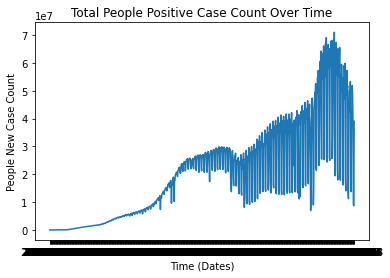

In [9]:
#Graph 1: Case count vs. time(dates) for the whole US population
x = new_grouped_df_tl["REPORT_DATE"]
y = new_grouped_df_tl["PEOPLE_POSITIVE_CASES_COUNT"]
plt.plot(x,y)
plt.title("Total People Positive Case Count Over Time")
plt.xlabel("Time (Dates)")
plt.ylabel("People New Case Count")
plt.show()

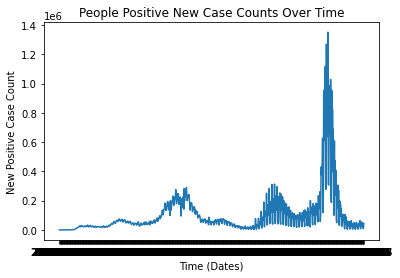

In [10]:
#Graph 2: Positive New Case count vs. time(dates) over the time
x1 = new_grouped_df_tl["REPORT_DATE"]
y1 = new_grouped_df_tl["PEOPLE_POSITIVE_NEW_CASES_COUNT"]
plt.plot(x1,y1)
plt.title("People Positive New Case Counts Over Time")
plt.xlabel("Time (Dates)")
plt.ylabel("New Positive Case Count")
plt.show()